<a href="https://colab.research.google.com/github/Masoud-Ghasemian/PyTorch_Basics/blob/master/Build_your_first_Neural_Network_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from torch import nn, optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!gdown --id 1Q1wUptbNDYdfizk5abhmoFxIQiX19Tn7

Downloading...
From: https://drive.google.com/uc?id=1Q1wUptbNDYdfizk5abhmoFxIQiX19Tn7
To: /content/weatherAUS.csv
14.2MB [00:00, 38.9MB/s]


In [3]:
df = pd.read_csv('weatherAUS.csv')

In [4]:
df.shape

(142193, 24)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
cols = ['Rainfall', 'Humidity9am', 'Pressure9am', 'RainToday', 'RainTomorrow']
df = df[cols]

In [7]:
df.shape

(142193, 5)

In [8]:
df.head()

,Rainfall,Humidity9am,Pressure9am,RainToday,RainTomorrow
0,0.6,71.0,1007.7,No,No
1,0.0,44.0,1010.6,No,No
2,0.0,38.0,1007.6,No,No
3,0.0,45.0,1017.6,No,No
4,1.0,82.0,1010.8,No,No


In [9]:
df['RainToday'].replace({'No':0, 'Yes':1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace = True)

In [10]:
df =df.dropna(how='any')

In [11]:
df.shape

(126111, 5)

Text(0, 0.5, 'Number of days')

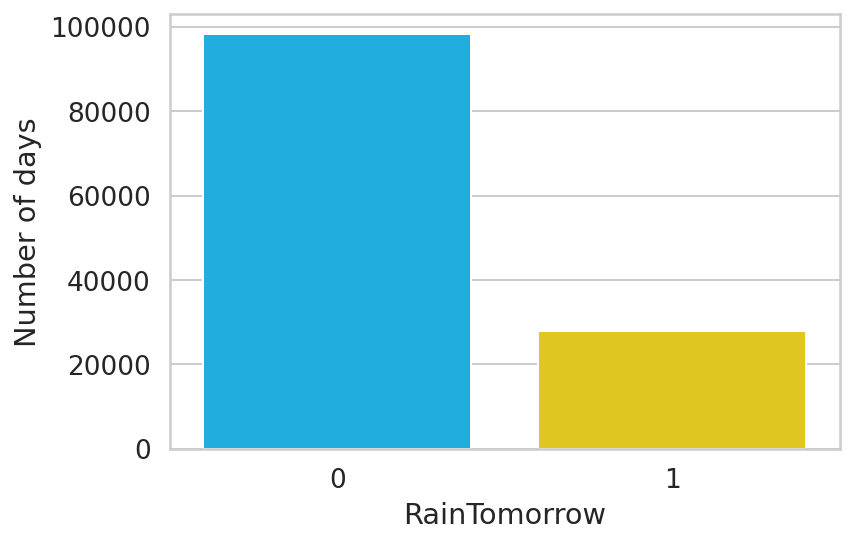

In [12]:
sns.countplot(df.RainTomorrow)
plt.ylabel('Number of days')

In [13]:
df.RainTomorrow.value_counts()/df.shape[0]

0    0.77856
1    0.22144
Name: RainTomorrow, dtype: float64

In [14]:
cols

['Rainfall', 'Humidity9am', 'Pressure9am', 'RainToday', 'RainTomorrow']

In [15]:
x = df[['Rainfall', 'Humidity9am', 'Pressure9am', 'RainToday']]
y = df[['RainTomorrow']]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = RANDOM_SEED)

In [17]:
x_train = torch.from_numpy(x_train.values).float()
x_test = torch.from_numpy(x_test.values).float()
y_train = torch.from_numpy(y_train.values).flatten().float()
y_test = torch.from_numpy(y_test.values).flatten().float()

In [18]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([100888, 4]) torch.Size([100888])
torch.Size([25223, 4]) torch.Size([25223])


In [19]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return F.sigmoid(self.fc3(x))

In [20]:
model = Net(x_train.shape[1])

In [21]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [22]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
         [-0.1096,  0.1009, -0.2434,  0.2936],
         [ 0.4408, -0.3668,  0.4346,  0.0936],
         [ 0.3694,  0.0677,  0.2411, -0.0706],
         [ 0.3854,  0.0739, -0.2334,  0.1274]], requires_grad=True),
 Parameter containing:
 tensor([-0.2304, -0.0586, -0.2031,  0.3317, -0.3947], requires_grad=True),
 Parameter containing:
 tensor([[-0.2062, -0.1263, -0.2689,  0.0422, -0.4417],
         [ 0.4039, -0.3799,  0.3453,  0.0744, -0.1452],
         [ 0.2764,  0.0697,  0.3613,  0.0489, -0.1410]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1202, -0.1213,  0.1882], requires_grad=True),
 Parameter containing:
 tensor([[ 0.5155,  0.3337, -0.2524]], requires_grad=True),
 Parameter containing:
 tensor([0.3333], requires_grad=True)]

In [23]:
model

Net(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [24]:
out = model(x_train[0:10])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [25]:
out = out.flatten()

In [26]:
out.shape

torch.Size([10])

In [27]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [28]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [29]:
model = model.to(device)
criterion = criterion.to(device)

In [51]:
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5)#.view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [67]:
correct_preds = 0
for epoch in range(1000):
  y_pred = model(x_train)
  y_pred = torch.squeeze(y_pred)
  loss = criterion(y_pred, y_train)
  if epoch % 100 == 0:

    train_acc = (y_pred.ge(0.5) == y_train).sum().float() / len(y_train)
    print(f'epoch: {epoch + 1}')
    print('-' * 10)
    print(f'loss: {loss}')
    print(f'train accuracy: {train_acc}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch: 1
----------
loss: 0.46244800090789795
train accuracy: 0.8004123568534851
epoch: 101
----------
loss: 0.4625777006149292
train accuracy: 0.7995103597640991
epoch: 201
----------
loss: 0.46253257989883423
train accuracy: 0.799569845199585
epoch: 301
----------
loss: 0.46251827478408813
train accuracy: 0.8007791042327881
epoch: 401
----------
loss: 0.4625481069087982
train accuracy: 0.800699770450592
epoch: 501
----------
loss: 0.4626643657684326
train accuracy: 0.7992228865623474
epoch: 601
----------
loss: 0.46234026551246643
train accuracy: 0.8003726601600647
epoch: 701
----------
loss: 0.462322473526001
train accuracy: 0.8004817366600037
epoch: 801
----------
loss: 0.4623051881790161
train accuracy: 0.8005411624908447
epoch: 901
----------
loss: 0.4622970521450043
train accuracy: 0.8002537488937378


In [68]:
classes = ['No rain', 'Raining']

In [69]:
y_pred = model(x_test)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [78]:
y_pred = y_pred.ge(0.5).view(-1)

In [79]:
y_test = y_test

In [80]:
print(classification_report(y_test, y_pred, target_names = classes))

              precision    recall  f1-score   support

     No rain       0.81      0.96      0.88     19599
     Raining       0.62      0.24      0.34      5624

    accuracy                           0.80     25223
   macro avg       0.72      0.60      0.61     25223
weighted avg       0.77      0.80      0.76     25223



In [84]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = classes, columns= classes)

Text(0.5, 9.5, 'Predicted label')

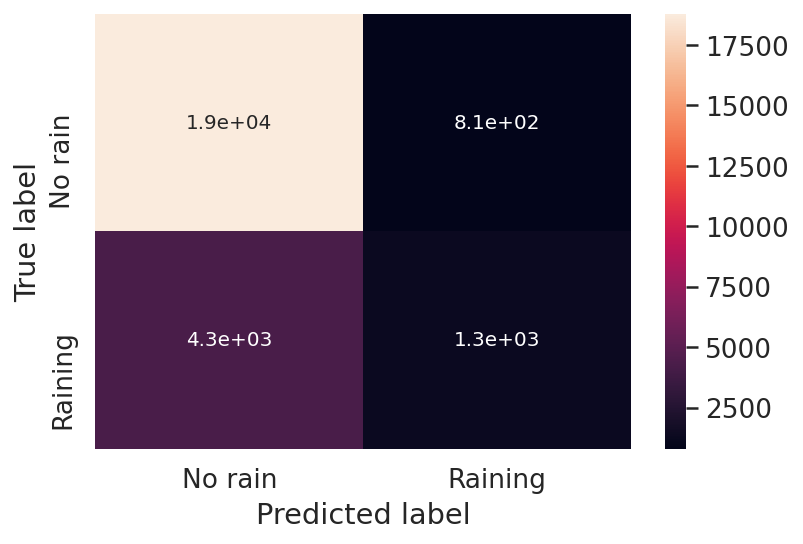

In [91]:
sns.heatmap(df_cm, annot = True )
plt.ylabel('True label')
plt.xlabel('Predicted label')